In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
from sklearn.linear_model import LinearRegression

In [129]:
dataset = np.genfromtxt('data.csv', delimiter=",")
df_data = pd.DataFrame(dataset)
df_data


,0,1,2
0,NaN,NaN,NaN
1,1.000000e+01,497.011658,22.697266
2,1.100000e+01,467.929018,85.654936
3,1.000000e+02,687.636705,37.409815
4,1.010000e+02,721.282777,61.604756
...,...,...,...
20516,1.110000e+14,2449.677898,99.885272
20517,1.110000e+14,2383.633711,152.198985
20518,1.110000e+14,2506.192775,30.706430
20519,1.110000e+14,2338.518533,11.138247


In [130]:
df_data.corr()

,0,1,2
0,1.000000,0.061353,0.000838
1,0.061353,1.000000,0.068621
2,0.000838,0.068621,1.000000


In [131]:
Q1 = df_data.quantile(0.25)
Q3 = df_data.quantile(0.75)

IQR = Q3 - Q1

In [132]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = ((df_data < lower_limit) | (df_data > upper_limit)).any(axis=1)

df_data = df_data[~outliers]
df_data.head(20)

,0,1,2
0,NaN,NaN,NaN
1,10.0,497.011658,22.697266
2,11.0,467.929018,85.654936
3,100.0,687.636705,37.409815
4,101.0,721.282777,61.604756
5,110.0,464.347767,46.354707
6,111.0,445.845391,75.481173
7,1000.0,891.713176,33.497447
8,1010.0,706.191923,21.543596
9,1011.0,445.557630,12.870775


In [133]:
df_data = (df_data - df_data.min()) / (df_data.max() - df_data.min())
df_data

,0,1,2
0,NaN,NaN,NaN
1,0.000000e+00,0.046097,0.034704
2,9.009009e-15,0.031603,0.206791
3,8.108108e-13,0.141096,0.074919
4,8.198198e-13,0.157864,0.141053
...,...,...,...
20513,1.000000e+00,0.914520,0.763543
20514,1.000000e+00,0.900674,0.531860
20515,1.000000e+00,0.917107,0.275509
20517,1.000000e+00,0.986309,0.388681


In [134]:
dataset = df_data.to_numpy()

dataset = dataset[~np.isnan(dataset).any(axis=1)]
dataset = dataset[~np.isinf(dataset).any(axis=1)]

In [135]:
random.shuffle(dataset)
split = int(0.2 * len(dataset))
train_data = dataset[split:]
test_data = dataset[:split]

In [136]:
def calculate_euclidean_distance(training_features, query_features):
    return np.sqrt(np.sum(np.square(query_features - training_features), axis=1))

def predict(train_data, test_instance, k):
    distances = calculate_euclidean_distance(train_data[:, :-1], test_instance[:-1])
    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[:k], -1])
    return predicted_value

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals / sum_squares)
    return r2

def count_errors(actual_target_values, predicted_target_values, threshold):
    errors = np.abs(predicted_target_values - actual_target_values) > threshold
    return np.sum(errors)

In [137]:
k_values = [141, 143, 145, 147, 149]
threshold = 0.1

for kn in k_values:
    predictions = []
    for i in range(len(test_data)):
        predicted_value = predict(train_data, test_data[i], kn)
        predictions.append(predicted_value)

    r2_score = calculate_r2(test_data[:, -1], predictions)
    number_of_errors = count_errors(test_data[:, -1], predictions, threshold)
    print(f"R2 score with k={kn} is:", r2_score)
    print(f"Number of errors with k={kn} is:", number_of_errors, "out of", len(test_data), "data", '\n')


R2 score with k=141 is: 0.09012873941258304
Number of errors with k=141 is: 2330 out of 3686 data 

R2 score with k=143 is: 0.0898597887357695
Number of errors with k=143 is: 2336 out of 3686 data 

R2 score with k=145 is: 0.09033161326920647
Number of errors with k=145 is: 2335 out of 3686 data 

R2 score with k=147 is: 0.08981278022995198
Number of errors with k=147 is: 2337 out of 3686 data 

R2 score with k=149 is: 0.08908137188827037
Number of errors with k=149 is: 2326 out of 3686 data 



In [138]:
y_true = test_data[:, -1]
y_pred = predictions

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23


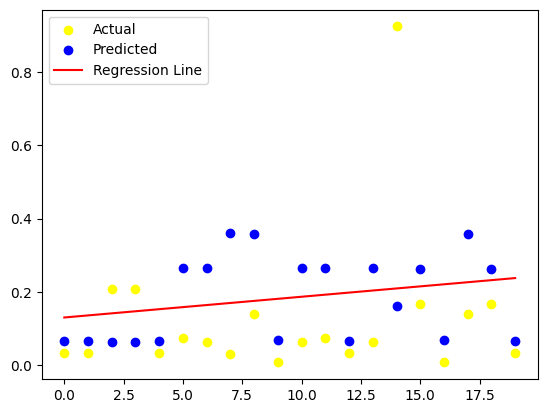

In [139]:
plt.scatter(np.arange(20), test_data[:20, -1], color='yellow', label='Actual')
plt.scatter(np.arange(20), predictions[:20], color='blue', label='Predicted')

model = LinearRegression()
model.fit(np.arange(20).reshape(-1, 1), predictions[:20])
regression_line = model.predict(np.arange(20).reshape(-1, 1))

plt.plot(np.arange(20), regression_line, color='red', label='Regression Line')
plt.legend()
plt.show()

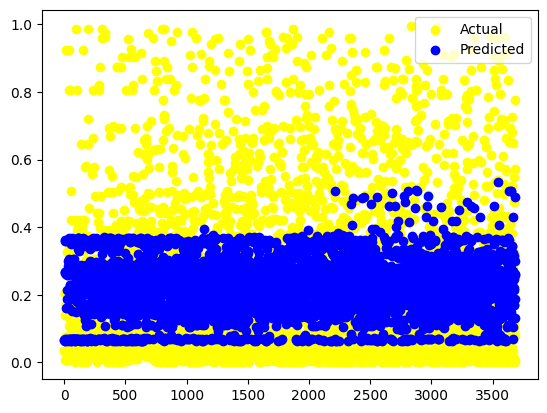

In [140]:
plt.scatter(np.arange(len(test_data)), test_data[:, -1], color='yellow', label='Actual')
plt.scatter(np.arange(len(predictions)), predictions, color='blue', label='Predicted')
plt.legend()
plt.show()